In [2]:
# Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams.update({'font.size': 12,
                 'axes.spines.right': False,
                 'axes.spines.top': False,
                 'axes.linewidth':1.2,
                 'xtick.major.size': 6,
                 'xtick.major.width': 1.2,
                 'ytick.major.size': 6,
                 'ytick.major.width': 1.2,
                 'legend.frameon': False,
                 'legend.handletextpad': 0.1,
                 'figure.figsize': [10.0, 3.0],
                 'svg.fonttype': 'none',
                 'text.usetex': False})

# 1. R/tau vs Temp

In [3]:
temperature_data = pd.read_excel('VO2_data_temperatures.xlsx',header=1)
temperature_data.head(10)

,Time,Resistance,Current (A),Resistance.1,Current (A).1,Resistance.2,Current (A).2,Resistance.3,Current (A).3,Resistance.4,Current (A).4,Resistance.5,Current (A).5,Resistance.6,Current (A).6,Resistance.7,Current (A).7
0,s,\g(W),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,30 °C,30 °C,40 °C,40 °C,45 °C,45 °C,50 °C,50 °C,56 °C,56 °C,59 °C,59 °C,62 °C,62 °C,68 °C,68 °C
2,0,12333.35016,0.000363,28.45832,0.08529,27.06,0.08756,26.84402,0.08774,25.82983,0.0896,26.02879,0.08959,25.9126,0.08959,25.4825,0.09027
3,0.001,169.46997,0.02587,25.60803,0.09997,25.57283,0.09997,25.34758,0.09997,25.27429,0.09996,25.46129,0.09996,25.49889,0.09996,25.32825,0.09996
4,0.002,25.83042,0.09997,25.52113,0.09996,25.66445,0.09996,25.35714,0.09996,25.31939,0.09996,25.48704,0.09996,25.53214,0.09996,25.39855,0.09996
5,0.003,25.83384,0.09996,25.52195,0.09996,25.66814,0.09996,25.37112,0.09996,25.34377,0.09996,25.51463,0.09996,25.56662,0.09996,25.43861,0.09996
6,0.004,25.83691,0.09996,25.52279,0.09996,25.67182,0.09996,25.38026,0.09996,25.36014,0.09996,25.5328,0.09996,25.59476,0.09996,25.47224,0.09996
7,0.005,25.8396,0.09996,25.52362,0.09996,25.67547,0.09996,25.39236,0.09996,25.37312,0.09996,25.54267,0.09996,25.60964,0.09996,25.49632,0.09996
8,0.006,25.84189,0.09996,25.52443,0.09996,25.67911,0.09996,25.39364,0.09996,25.37937,0.09996,25.55281,0.09996,25.62402,0.09996,25.50901,0.09996
9,0.007,25.84379,0.09996,25.52521,0.09996,25.68273,0.09996,25.40296,0.09996,25.38477,0.09996,25.56733,0.09996,25.63686,0.09996,25.52068,0.09996


In [4]:
# Extract relevant variables 

temps = np.array(temperature_data.iloc[1][1::2])
time = np.array(temperature_data['Time'][2:])
resistance_traces = np.array(temperature_data.iloc[2:,1::2]).T
current_traces = np.array(temperature_data.iloc[2:,2::2]).T

resistance_traces[:,0:500] = 30

tau = np.zeros(len(temps))
for i,R in enumerate(resistance_traces):
    tau_R = (1-np.exp(-1)) * R[-1] # value of R at the tau timepoint
    tau[i] = time[np.where(R>tau_R)[0][0]] - 1 # in seconds
    
time_to_insulator = np.zeros(len(temps))
insulator_R = 50
for i,R in enumerate(resistance_traces):
    time_to_insulator[i] = time[np.where(R>insulator_R)[0][0]] -1 # in seconds

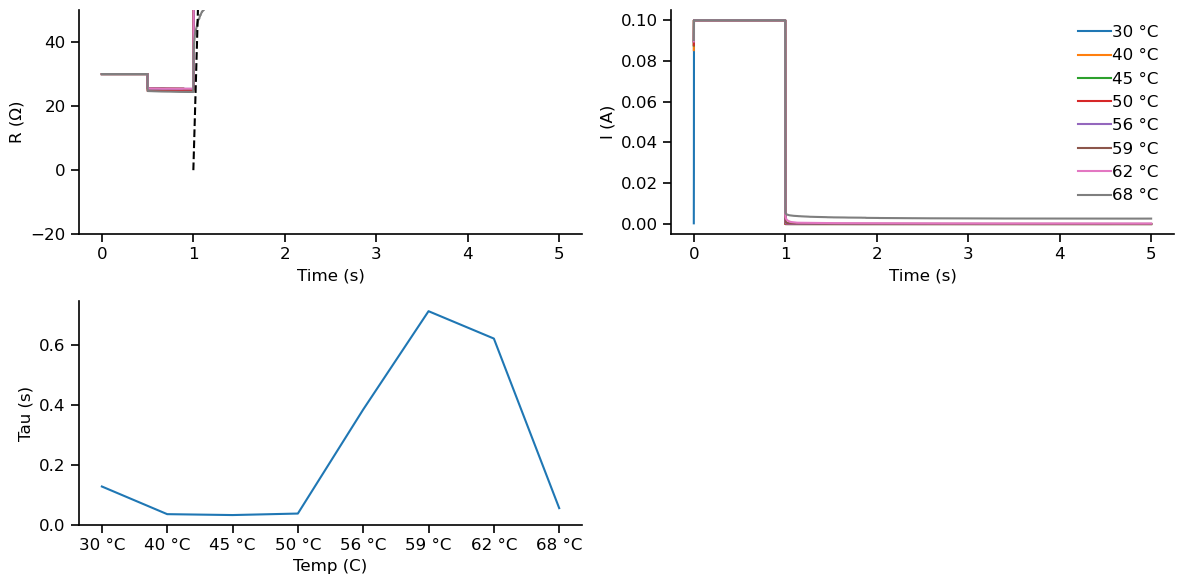

In [12]:
# Plot data 

fig,ax = plt.subplots(2,2,figsize=[12,6])

ax[0,0].plot(time,resistance_traces.T,label=temps)
ax[0,0].set_xlabel('Time (s)')
ax[0,0].set_ylabel('R (Ω)')
# ax[0,0].set_xlim([1.,1.05])
# ax[0,0].set_ylim(top=45000)
# ax[0,0].set_ylim([-500,5000])
ax[0,0].set_ylim([-20,50])
# ax[0,0].set_xlim([0.95,5])

x = np.array([1,1.05])
y = 0.1*1e4 * (x-1)
ax[0,0].plot(x,y,'--k')

ax[0,1].plot(time,current_traces.T,label=temps)
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_ylabel('I (A)')
# ax[0,1].set_xlim([1.,1.1])
# ax[0,1].set_ylim([0.,0.015])
ax[0,1].legend()
  
ax[1,0].plot(temps,tau)
ax[1,0].set_xlabel('Temp (C)')
ax[1,0].set_ylabel('Tau (s)')

# slopes = np.array([0.45*1e6, 0.35*1e6, 0.29*1e6, 0.23*1e6, 0.25*1e5, 0.2*1e5, 0.4*1e4, 0.1*1e4])
# temps = np.array([30,40,45,50,56,59,62,68])
# ax[1,1].plot(temps,slopes)
# ax[1,1].set_xlabel('Temperature (C)')
# ax[1,1].set_ylabel('Linear Slope')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

# 2. R/tau vs current steps

In [42]:
Isteps_data = pd.read_excel('VO2_data_currents.xlsx',header=0)
Isteps_data.head(10)

In [43]:
# Extract relevant variables 

time = np.array(Isteps_data['Time'][2:])
Isteps = np.array(Isteps_data.iloc[1][1::4])
voltage_traces = np.array(Isteps_data.iloc[2:,1::4]).T
resistance_traces = np.array(Isteps_data.iloc[2:,2::4]).T
current_traces = np.array(Isteps_data.iloc[2:,3::4]).T

tau = np.zeros(len(Isteps))
for i,R in enumerate(resistance_traces):
    tau_R = (1-np.exp(-1)) * (R[-1]-R[0]) # value of R at the tau timepoint
    tau[i] = time[np.where(R>tau_R)[0][0]] # in seconds

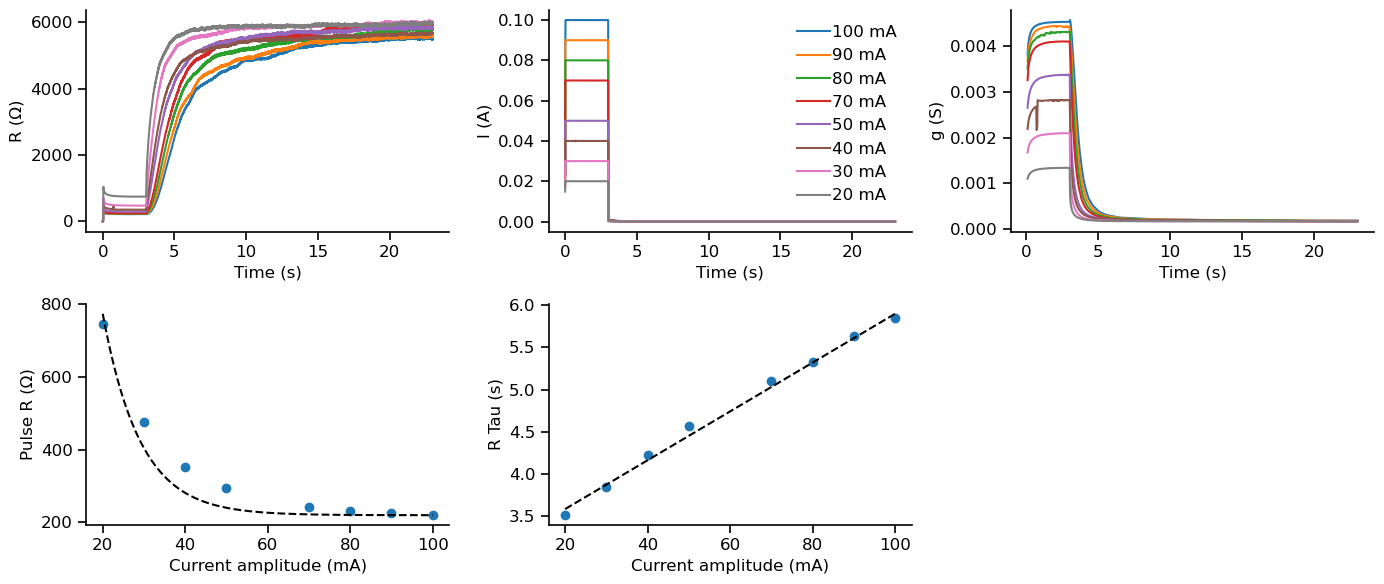

In [84]:
# Plot data 

fig,ax = plt.subplots(2,3,figsize=[14,6])

for i,R in enumerate(resistance_traces):
    ax[0,0].plot(time, R, label=Isteps[i])
ax[0,0].set_xlabel('Time (s)')
ax[0,0].set_ylabel('R (Ω)')
# ax[0,0].set_xlim([1.,1.05])
# ax[0,0].set_ylim(top=5000)
 
for i,I in enumerate(current_traces):
    ax[0,1].plot(time, I, label=Isteps[i])
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_ylabel('I (A)')
ax[0,1].legend()

ax[0,2].plot(time[100:], 1/resistance_traces.T[100:], label=Isteps[i])
ax[0,2].set_xlabel('Time (s)')
ax[0,2].set_ylabel('g (S)')

ax[1,2].axis('off')

conducting_R = np.flip(resistance_traces[:,3000])
current_steps = np.array([20,30,40,50,70,80,90,100])
ax[1,0].scatter(current_steps,conducting_R)
ax[1,0].set_ylabel('Pulse R (Ω)')
ax[1,0].set_xlabel('Current amplitude (mA)')

x = np.linspace(20,100,1000)
y = lambda x: 5000*np.exp(-0.11*x)+220
ax[1,0].plot(x,y(x), '--k')

ax[1,1].scatter(current_steps,np.flip(tau))
# ax[1,1].scatter(conducting_R,np.flip(tau))
ax[1,1].set_xlabel('Current amplitude (mA)')
ax[1,1].set_ylabel('R Tau (s)')

# tau_fit = lambda x: 0.44 * (x)**0.5 + 1.45
tau_fit = lambda x: 0.029 * x + 3
# tau_fit = lambda x: 0.018 * x**1.1 + 3
# tau_fit = lambda x: 0.012 * x**1.2 + 3
ax[1,1].plot(current_steps,tau_fit(current_steps),'--k')

plt.tight_layout()
plt.show()

# 3. R vs V (insulator-metal transition)

In [37]:
RV_data = pd.read_csv('VO2_data_RvsV_transition.csv',header=34)
RV_data.head(10)

In [38]:
# Extract relevant variables 

time = RV_data['SMU-1 Time (s)']
V = RV_data['SMU-1 Voltage (V)']
I = RV_data['SMU-1 Current (A)']
R = RV_data['SMU-1 Resistance (Ω)']

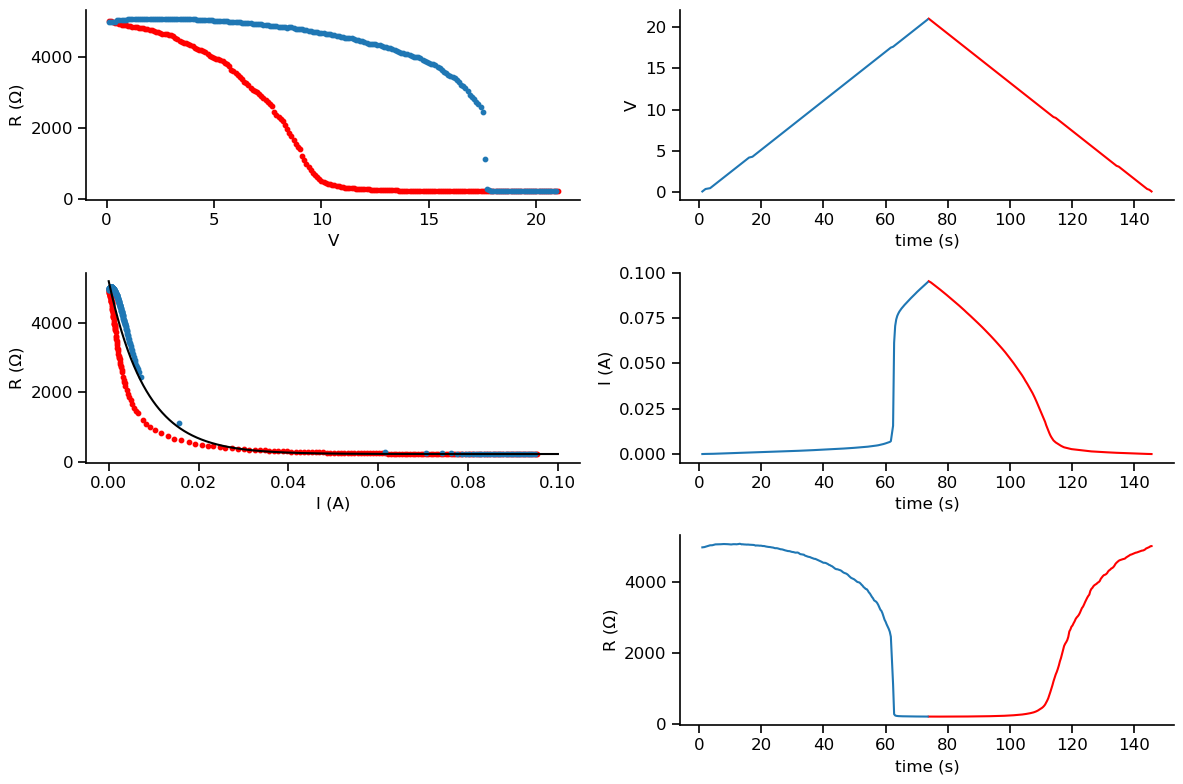

In [39]:
# Plot data 

fig,ax = plt.subplots(3,2,figsize=[12,8])

ax[0,0].scatter(V[209:],R[209:],s=10,c='r')
ax[0,0].scatter(V[:209],R[:209],s=10)
ax[0,0].set_xlabel('V')
ax[0,0].set_ylabel('R (Ω)')

ax[1,0].scatter(I[209:],R[209:],s=10,c='r')
ax[1,0].scatter(I[:209],R[:209],s=10)
ax[1,0].set_xlabel('I (A)')
ax[1,0].set_ylabel('R (Ω)')

x = np.linspace(0,100,1000)
y = lambda x: 5000*np.exp(-0.12*x)+220
ax[1,0].plot(x/1000,y(x), 'k')

ax[0,1].plot(time[209:], V[209:], 'r')
ax[0,1].plot(time[:209], V[:209])
ax[0,1].set_xlabel('time (s)')
ax[0,1].set_ylabel('V')

ax[1,1].plot(time[209:], I[209:], 'r')
ax[1,1].plot(time[:209], I[:209])
ax[1,1].set_xlabel('time (s)')
ax[1,1].set_ylabel('I (A)')

ax[2,1].plot(time[209:], R[209:], 'r')
ax[2,1].plot(time[:209], R[:209])
ax[2,1].set_xlabel('time (s)')
ax[2,1].set_ylabel('R (Ω)')

ax[2,0].axis('off')
plt.tight_layout()
plt.show()

# Short voltage pulses

In [6]:
Vsteps_data = {}
for file in os.listdir('short_Vpulses_data'):
    if file.endswith('.csv'):
        Vsteps_data[file] = pd.read_csv('short_Vpulses_data/'+file,header=0)

# Vsteps_data.head(10)
Vsteps_data['5V_0.01s_68.5C.csv'].head(10)

,Index,SMU-1 Time (s),SMU-1 Resistance (Ω),SMU-1 Voltage (V),SMU-1 Current (A)
0,1.0,0.0000,690.721794,2.708057,0.003921
1,NaN,0.0002,659.555035,4.991375,0.007568
2,NaN,0.0004,642.453487,4.998558,0.007780
3,NaN,0.0006,630.352705,4.997613,0.007928
4,NaN,0.0008,620.542627,4.997561,0.008054
5,NaN,0.0010,612.199217,4.997500,0.008163
6,NaN,0.0012,604.882120,4.997695,0.008262
7,NaN,0.0014,598.416441,4.997648,0.008351
8,NaN,0.0016,592.486809,4.997831,0.008435
9,NaN,0.0018,587.139229,4.997669,0.008512


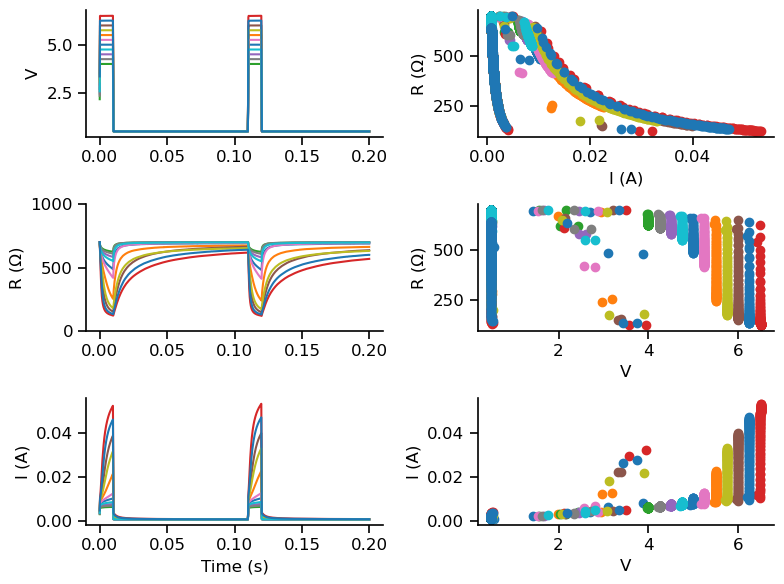

In [36]:
fig, ax = plt.subplots(3,2,figsize=[8,6])

for pulse_amp in Vsteps_data.keys():
    time = Vsteps_data[pulse_amp]['SMU-1 Time (s)'][:1000]
    V = Vsteps_data[pulse_amp]['SMU-1 Voltage (V)'][:1000]
    I = Vsteps_data[pulse_amp]['SMU-1 Current (A)'][:1000]
    R = Vsteps_data[pulse_amp]['SMU-1 Resistance (Ω)'][:1000]

    ax[0,0].plot(time,V,label=pulse_amp)
    ax[0,0].set_ylabel('V')

    ax[1,0].plot(time,R,label=pulse_amp)
    ax[1,0].set_ylabel('R (Ω)')
    ax[1,0].set_ylim([0,1000])

    ax[2,0].plot(time,I,label=pulse_amp)
    ax[2,0].set_ylabel('I (A)')
    ax[2,0].set_xlabel('Time (s)')

    ax[0,1].scatter(I,R,label=pulse_amp)
    ax[0,1].set_xlabel('I (A)')
    ax[0,1].set_ylabel('R (Ω)')
    ax[1,1].scatter(V,R,label=pulse_amp)
    ax[1,1].set_xlabel('V')
    ax[1,1].set_ylabel('R (Ω)')
    ax[2,1].scatter(V,I,label=pulse_amp)
    ax[2,1].set_xlabel('V')
    ax[2,1].set_ylabel('I (A)')

plt.tight_layout()
